In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_df=pd.read_csv("/content/final_df")

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(final_df)
final_df['Cluster'] = labels

In [6]:
final_df

,CustomerID,TotalTransactions,TotalSpending,transaction_Recency,UniqueProducts,SignupDuration,Region_Europe,Region_North America,Region_South America,FavouriteCategory_Clothing,FavouriteCategory_Electronics,FavouriteCategory_Home Decor,Cluster
0,1,5,-0.061701,0.197399,5,1.148752,0,0,1,0,1,0,2
1,2,4,-0.877744,-0.274018,4,1.600431,0,0,0,1,0,0,2
2,3,4,-0.405857,0.379971,4,-0.713270,0,0,1,0,0,1,2
3,4,8,1.032547,-0.769052,8,0.869141,0,0,1,0,0,0,2
4,5,3,-0.783929,0.066601,3,1.038137,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,196,4,0.829053,-2.063407,3,1.250149,1,0,0,0,0,1,1
195,197,3,-0.841689,0.096879,3,0.368300,1,0,0,0,1,0,1
196,198,2,-1.386975,-1.859035,2,1.557414,1,0,0,1,0,0,1
197,199,4,-0.813993,-1.581998,4,0.700146,1,0,0,0,1,0,1


In [7]:
db_index = davies_bouldin_score(final_df.iloc[:,:-1], labels)
print('Davies-Bouldin Index:', db_index)

Davies-Bouldin Index: 0.5485735437865245


**A DB Index of 0.5486 indicates that the clusters are well-formed, with customers in each cluster being similar and the clusters clearly separated.**

In [10]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(final_df.iloc[:,:-1])

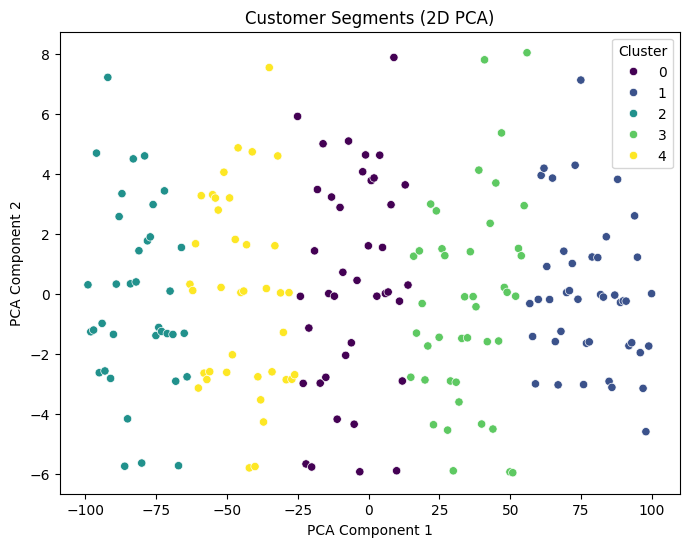

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=final_df['Cluster'], palette='viridis')
plt.title('Customer Segments (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()